In [128]:
import numpy as np
np.set_printoptions(linewidth=500)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

### Visualizing high Dimesional Data

In [2]:
mnist=pd.read_csv("MNIST/train.csv")
Y=mnist["label"]
X=mnist.drop("label",axis=1)
X=X.head(15000)
Y=Y.head(15000)

### Principle Component analysis

In [35]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
standardizedX = StandardScaler().fit_transform(X)

In [32]:
img=15
ex=X.iloc[15].to_numpy().reshape(28,28)
print("label of the image is:"+str(Y[img]))
print(ex)
#plt.imshow(ex)

label of the image is:1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 236  73   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 253  92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  14 207 214   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   

In [20]:
img=15
stex=standardizedX[img].reshape(28,28)
print("label of the image is:"+str(Y[img]))
print(stex.round(2))
#plt.imshow(stex)

label of the image is:1
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.01 -0.01 -0.02 -0.02 -0.03 -0.03 -0.03 -0.02 -0.03 -0.03 -0.03 -0.03 -0.02 -0.02 -0.02 -0.01 -0.01  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.01 -0.01 -0.02 -0.03 -0.04 -0.06 -0.07 -0.09 -0.1  -0.12 -0.13 -0.14 -0.14 -0.13 -0.12 -0.1  -0.08 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.  ]
 [ 0.    0.    0.   -0.01 -0.01 -0.02 -0.04 -0.06 -0.09 -0.11 -0.15 -0.18 -0.2  -0.23 -0.26 -0.27 -0.27 -0.25 -0.22 -0.18 -0.15 -0.11 -0.08 -0.05 -0.04 -0.02 -0.01  0.  ]
 [ 0.    0.    0.   -0.01 -0.02 -0.05 -0.08 -0.12 -0.16 -0.22 -0.28 -0.34 -0.4  -0.46 -0.51 -0.53 -0.52 -0.48 -0.42 -0.36 -0.29 -0.22 -0.16 -0.11 -0.08 -0.04 -0.02  0.  ]
 [ 0.    0.   -0.01 -0.02 -0.05 -0.08 -0.14 -0.2  -0.27 -0.34 -0.43 -0.53 -0.63 -0.73 -0.81 -0.85 -0.48  1.49  0.07 -0.56

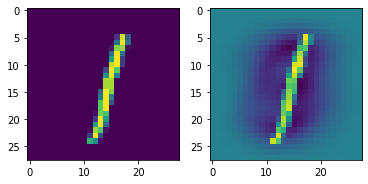

In [17]:
arr,axi=plt.subplots(1,2)
axi[0].imshow(ex)
axi[1].imshow(stex)
plt.show()

In [22]:
sample=standardizedX
cov=np.dot(sample.T,sample)

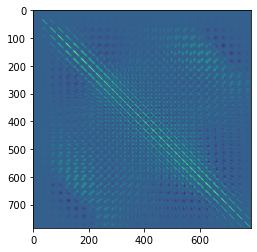

In [33]:
#visualizing the covariance matrix 
plt.imshow(cov) 

In [106]:
eigvalues, eigvectors = eigh(cov)
print("Shape of eigen vectors = ",eigvectors.shape)
#vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
print("The top 2 eigen values are "+str(eigvalues[782:])) 

Shape of eigen vectors =  (784, 784)
Updated shape of eigen vectors =  (784, 784)
The top 2 eigen values are [435532.55785282 605719.29173629]


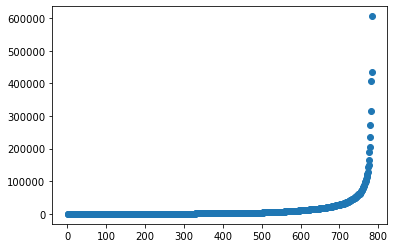

In [107]:
#eigen values of the covariance matrix
line=np.linspace(1, 784, num=784)
plt.scatter(line,eigvalues)

In [112]:
top2=eigvectors[:,[782,783]]
top2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [115]:
#projecting the data onto principle components vectors
new_coordinates=np.dot(top2.T,sample.T)
Xnew=np.vstack((new_coordinates,Y)).T
dataframe = pd.DataFrame(data=Xnew, columns=("1st_principal", "2nd_principal", "label"))

<IPython.core.display.Javascript object>


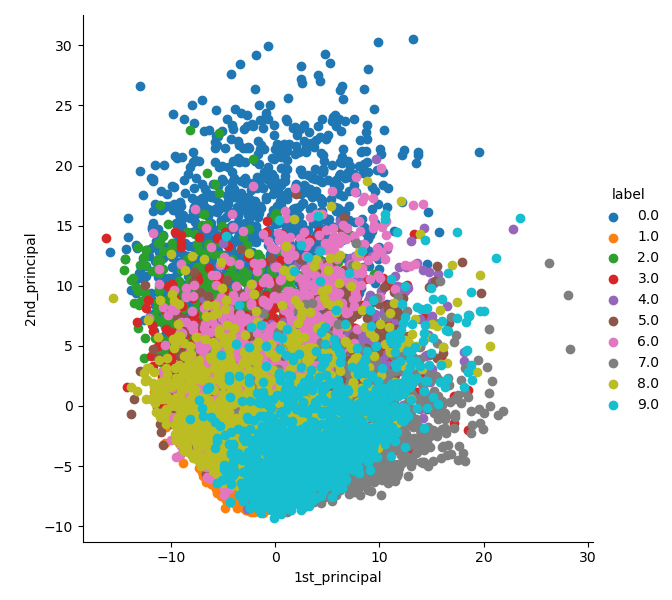

In [133]:
# ploting the 2d data points with seaborn
%matplotlib notebook
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### PCA using Scikitlearn

shape of pca_reduced.shape =  (15000, 2)


<IPython.core.display.Javascript object>


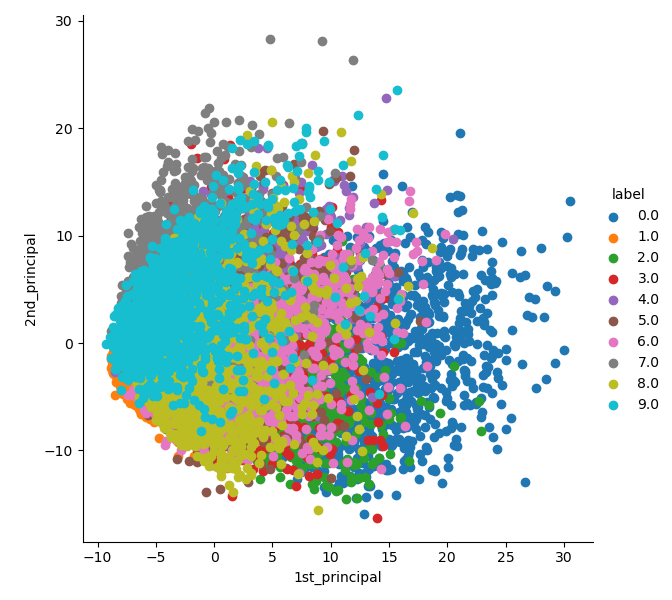

In [140]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample)
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, Y)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA for dimensionality redcution

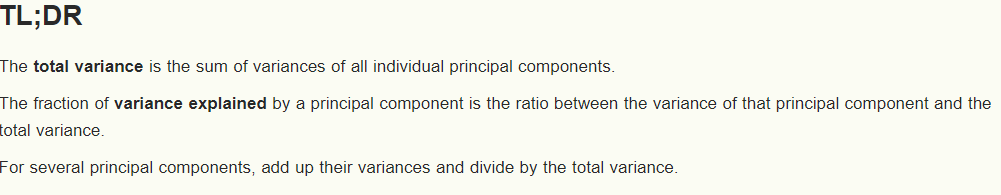
<a href="https://ro-che.info/articles/2017-12-11-pca-explained-variance#:~:text=The%20fraction%20of%20variance%20explained,divide%20by%20the%20total%20variance.">source</a>

<IPython.core.display.Javascript object>


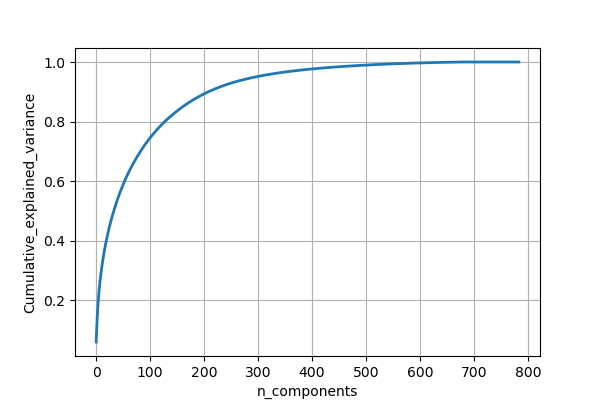

In [151]:
pca.n_components = 784
pca_data = pca.fit_transform(sample)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()